In [ ]:
!pip install --upgrade transformers datasets evaluate huggingface_hub torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2
ERROR: pip's de

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AIBD/Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
df["Email Text"] = df["Email Text"].replace("empty", np.nan)

In [ ]:
# Check NAN values
df.isna().sum()

,0
Unnamed: 0,0
Email Text,549
Email Type,0


In [ ]:
#Drop tha Na values
df = df.dropna()
print(df.isna().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [ ]:
#dataset shape
df.shape

(18101, 3)

In [ ]:
# Count the occurrences of each E-mail type.
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)

Email Type
Safe Email        11124
Phishing Email     6977
Name: count, dtype: int64


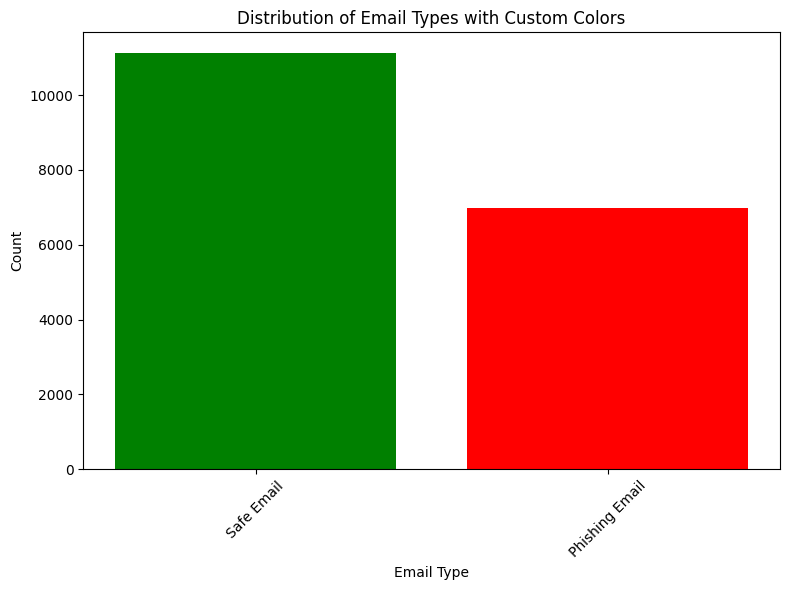

In [ ]:
# Create the bar chart
# Create a list of unique email types
unique_email_types = email_type_counts.index.tolist()

# Define a custom color map
color_map = {
    'Phishing Email': 'red',
    'Safe Email': 'green',}

# Map the colors to each email type
colors = [color_map.get(email_type, 'gray') for email_type in unique_email_types]

# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(unique_email_types, email_type_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types with Custom Colors')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

In [ ]:
# We will use undersapling technique
Safe_Email = df[df["Email Type"]== "Safe Email"]
Phishing_Email = df[df["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [ ]:
# lets check the shape again
Safe_Email.shape,Phishing_Email.shape

((6977, 3), (6977, 3))

In [ ]:
# let create a new Data with the balanced E-mail types
dataset= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
dataset.head()

,Unnamed: 0,Email Text,Email Type
0,14316,envision meeting structures and way forwards s...,Safe Email
1,14800,Chuck Murcko wrote:\n>[...stuff...]Yawn.R\n,Safe Email
2,3745,query about english interrogatives i would app...,Safe Email
3,1542,jeff mcmahon named cfo today we announced the ...,Safe Email
4,17841,tammie schoppe enron americas - office of the ...,Safe Email


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

def replace_email(input_string):

    output_string = re.sub(r'\b[A-Za-z0-9._%+-]+@([A-Za-z0-9.-]+\.[A-Z|a-z]{2,})\b', '<emailaddress>', input_string)

    return output_string

def replace_url(input_string):

    output_string = re.sub(r'((http|ftp|https)\:\/\/)?([\w_\.-]+(?:\.(zw|zuerich|zone|zm|zip|zero|zara|zappos|za|yun|yt|youtube|you|yokohama|yoga|yodobashi|ye|yandex|yamaxun|yahoo|yachts|xyz|xxx|xn--zfr164b|xn--ygbi2ammx|xn--yfro4i67o|xn--y9a3aq|xn--xkc2dl3a5ee0h|xn--xkc2al3hye2a|xn--xhq521b|xn--wgbl6a|xn--wgbh1c|xn--w4rs40l|xn--w4r85el8fhu5dnra|xn--vuq861b|xn--vhquv|xn--vermgensberatung-pwb|xn--vermgensberater-ctb|xn--unup4y|xn--tiq49xqyj|xn--tckwe|xn--t60b56a|xn--ses554g|xn--s9brj9c|xn--rvc1e0am3e|xn--rovu88b|xn--rhqv96g|xn--qxam|xn--qxa6a|xn--qcka1pmc|xn--q9jyb4c|xn--q7ce6a|xn--pssy2u|xn--pgbs0dh|xn--p1ai|xn--p1acf|xn--otu796d|xn--ogbpf8fl|xn--o3cw4h|xn--nyqy26a|xn--nqv7fs00ema|xn--nqv7f|xn--node|xn--ngbrx|xn--ngbe9e0a|xn--ngbc5azd|xn--mxtq1m|xn--mk1bu44c|xn--mix891f|xn--mgbx4cd0ab|xn--mgbtx2b|xn--mgbt3dhd|xn--mgbpl2fh|xn--mgbi4ecexp|xn--mgbgu82a|xn--mgberp4a5d4ar|xn--mgbcpq6gpa1a|xn--mgbca7dzdo|xn--mgbc0a9azcg|xn--mgbbh1a71e|xn--mgbbh1a|xn--mgbayh7gpa|xn--mgbai9azgqp6j|xn--mgbah1a3hjkrd|xn--mgbab2bd|xn--mgbaam7a8h|xn--mgbaakc7dvf|xn--mgba7c0bbn0a|xn--mgba3a4f16a|xn--mgba3a3ejt|xn--mgb9awbf|xn--lgbbat1ad8j|xn--l1acc|xn--kput3i|xn--kpry57d|xn--kprw13d|xn--kcrx77d1x4a|xn--jvr189m|xn--jlq61u9w7b|xn--jlq480n2rg|xn--j6w193g|xn--j1amh|xn--j1aef|xn--io0a7i|xn--imr513n|xn--i1b6b1a6a2e|xn--hxt814e|xn--h2brj9c8c|xn--h2brj9c|xn--h2breg3eve|xn--gk3at1e|xn--gecrj9c|xn--gckr3f0f|xn--g2xx48c|xn--fzys8d69uvgm|xn--fzc2c9e2c|xn--fpcrj9c3d|xn--flw351e|xn--fjq720a|xn--fiqz9s|xn--fiqs8s|xn--fiq64b|xn--fiq228c5hs|xn--fhbei|xn--fct429k|xn--efvy88h|xn--eckvdtc9d|xn--e1a4c|xn--d1alf|xn--d1acj3b|xn--czru2d|xn--czrs0t|xn--czr694b|xn--clchc0ea0b2g2a9gcd|xn--cg4bki|xn--cckwcxetd|xn--cck2b3b|xn--c2br7g|xn--c1avg|xn--bck1b9a5dre4c|xn--b4w605ferd|xn--9krt00a|xn--9et52u|xn--9dbq2a|xn--90ais|xn--90ae|xn--90a3ac|xn--8y0a063a|xn--80aswg|xn--80asehdb|xn--80aqecdr1a|xn--80ao21a|xn--80adxhks|xn--6qq986b3xl|xn--6frz82g|xn--5tzm5g|xn--5su34j936bgsg|xn--55qx5d|xn--55qw42g|xn--54b7fta0cc|xn--4gbrim|xn--4dbrk0ce|xn--45q11c|xn--45brj9c|xn--45br5cyl|xn--42c2d9a|xn--3pxu8k|xn--3hcrj9c|xn--3e0b707e|xn--3ds443g|xn--3bst00m|xn--30rr7y|xn--2scrj9c|xn--1qqw23a|xn--1ck2e1b|xn--11b4c3d|xin|xihuan|xfinity|xerox|xbox|wtf|wtc|ws|wow|world|works|work|woodside|wolterskluwer|wme|winners|wine|windows|win|williamhill|wiki|wien|whoswho|wf|weir|weibo|wedding|wed|website|weber|webcam|weatherchannel|weather|watches|watch|wanggou|wang|walter|walmart|wales|vuelos|vu|voyage|voto|voting|vote|volvo|volkswagen|vodka|vn|vlaanderen|vivo|viva|vision|visa|virgin|vip|vin|villas|viking|vig|video|viajes|vi|vg|vet|versicherung|verisign|ventures|vegas|ve|vc|vanguard|vana|vacations|va|uz|uy|us|ups|uol|uno|university|unicom|uk|ug|ubs|ubank|ua|tz|tw|tvs|tv|tushu|tunes|tui|tube|tt|trv|trust|travelersinsurance|travelers|travelchannel|travel|training|trading|trade|tr|toys|toyota|town|tours|total|toshiba|toray|top|tools|tokyo|today|to|tn|tmall|tm|tl|tkmaxx|tk|tjx|tjmaxx|tj|tirol|tires|tips|tiffany|tienda|tickets|tiaa|theatre|theater|thd|th|tg|tf|teva|tennis|temasek|tel|technology|tech|team|tdk|td|tci|tc|taxi|tax|tattoo|tatar|tatamotors|target|taobao|talk|taipei|tab|sz|systems|sydney|sy|sx|swiss|swatch|sv|suzuki|surgery|surf|support|supply|supplies|sucks|su|style|study|studio|stream|store|storage|stockholm|stcgroup|stc|statefarm|statebank|star|staples|stada|st|ss|srl|sr|spot|sport|space|spa|soy|sony|song|solutions|solar|sohu|software|softbank|social|soccer|so|sncf|sn|smile|smart|sm|sling|sl|skype|sky|skin|ski|sk|sj|site|singles|sina|silk|si|showtime|show|shouji|shopping|shop|shoes|shiksha|shia|shell|shaw|sharp|shangrila|sh|sg|sfr|sexy|sex|sew|seven|ses|services|sener|select|seek|security|secure|seat|search|se|sd|scot|science|schwarz|schule|school|scholarships|schmidt|schaeffler|scb|sca|sc|sbs|sbi|sb|saxo|save|sas|sarl|sap|sanofi|sandvikcoromant|sandvik|samsung|samsclub|salon|sale|sakura|safety|safe|saarland|sa|ryukyu|rwe|rw|run|ruhr|rugby|ru|rsvp|rs|room|rogers|rodeo|rocks|rocher|ro|rip|rio|ril|ricoh|richardli|rich|rexroth|reviews|review|restaurant|rest|republican|report|repair|rentals|rent|ren|reliance|reit|reisen|reise|rehab|redumbrella|redstone|red|recipes|realty|realtor|realestate|read|re|radio|racing|quest|quebec|qpon|qa|py|pwc|pw|pub|pt|ps|prudential|pru|protection|property|properties|promo|progressive|prof|productions|prod|pro|prime|press|praxi|pramerica|pr|post|porn|politie|poker|pohl|pnc|pn|pm|plus|plumbing|playstation|play|place|pl|pk|pizza|pioneer|pink|ping|pin|pid|pictures|pictet|pics|physio|photos|photography|photo|phone|philips|phd|pharmacy|ph|pg|pfizer|pf|pet|pe|pccw|pay|passagens|party|parts|partners|pars|paris|panasonic|page|pa|ovh|ott|otsuka|osaka|origins|organic|org|orange|oracle|open|ooo|online|onl|ong|one|omega|om|ollo|oldnavy|olayangroup|olayan|okinawa|office|observer|obi|nz|nyc|nu|ntt|nrw|nra|nr|np|nowtv|nowruz|now|norton|northwesternmutual|nokia|no|nl|nissay|nissan|ninja|nikon|nike|nico|ni|nhk|ngo|ng|nfl|nf|nexus|nextdirect|next|news|new|neustar|network|netflix|netbank|net|nec|ne|nc|nba|navy|natura|name|nagoya|nab|na|mz|my|mx|mw|mv|mutual|music|museum|mu|mtr|mtn|mt|msd|ms|mr|mq|mp|movie|mov|motorcycles|moto|moscow|mortgage|mormon|monster|money|monash|mom|moi|moe|moda|mobile|mobi|mo|mn|mma|mm|mls|mlb|ml|mk|mitsubishi|mit|mint|mini|mil|microsoft|miami|mh|mg|merckmsd|menu|men|memorial|meme|melbourne|meet|media|med|me|md|mckinsey|mc|mba|mattel|maserati|marshalls|marriott|markets|marketing|market|map|mango|management|man|makeup|maison|maif|madrid|macys|ma|ly|lv|luxury|luxe|lundbeck|lu|ltda|ltd|lt|ls|lr|lplfinancial|lpl|love|lotto|lotte|london|lol|loft|locus|locker|loans|loan|llp|llc|lk|living|live|lipsy|link|linde|lincoln|limo|limited|lilly|like|lighting|lifestyle|lifeinsurance|life|lidl|li|lgbt|lexus|lego|legal|lefrak|leclerc|lease|lds|lc|lb|lawyer|law|latrobe|latino|lat|lasalle|lanxess|landrover|land|lancia|lancaster|lamer|lamborghini|lacaixa|la|kz|kyoto|ky|kw|kuokgroup|kred|krd|kr|kpn|kpmg|kp|kosher|komatsu|koeln|kn|km|kiwi|kitchen|kindle|kinder|kim|kids|kia|ki|kh|kg|kfh|kerryproperties|kerrylogistics|kerryhotels|ke|kddi|kaufen|juniper|juegos|jprs|jpmorgan|jp|joy|jot|joburg|jobs|jo|jnj|jmp|jm|jll|jio|jewelry|jetzt|jeep|je|jcb|java|jaguar|itv|itau|it|istanbul|ist|ismaili|is|irish|ir|iq|ipiranga|io|investments|intuit|international|int|insure|insurance|institute|ink|ing|info|infiniti|industries|inc|in|immobilien|immo|imdb|imamat|im|il|ikano|ifm|ieee|ie|id|icu|ice|icbc|ibm|hyundai|hyatt|hughes|hu|ht|hsbc|hr|how|house|hotmail|hotels|hoteles|hot|hosting|host|hospital|horse|honda|homesense|homes|homegoods|homedepot|holiday|holdings|hockey|hn|hm|hkt|hk|hiv|hitachi|hisamitsu|hiphop|hgtv|hermes|here|helsinki|help|healthcare|health|hdfcbank|hdfc|hbo|haus|hangout|hamburg|hair|gy|gw|guru|guitars|guide|guge|gucci|guardian|gu|gt|gs|group|grocery|gripe|green|gratis|graphics|grainger|gr|gq|gp|gov|got|gop|google|goog|goodyear|goo|golf|goldpoint|gold|godaddy|gn|gmx|gmo|gmbh|gmail|gm|globo|global|gle|glass|gl|giving|gives|gifts|gift|gi|gh|ggee|gg|gf|george|genting|gent|gea|ge|gdn|gd|gbiz|gb|gay|garden|gap|games|game|gallup|gallo|gallery|gal|ga|fyi|futbol|furniture|fund|fun|fujitsu|ftr|frontier|frontdoor|frogans|frl|fresenius|free|fr|fox|foundation|forum|forsale|forex|ford|football|foodnetwork|food|foo|fo|fm|fly|flowers|florist|flir|flights|flickr|fk|fj|fitness|fit|fishing|fish|firmdale|firestone|fire|financial|finance|final|film|fido|fidelity|fiat|fi|ferrero|ferrari|feedback|fedex|fast|fashion|farmers|farm|fans|fan|family|faith|fairwinds|fail|fage|extraspace|express|exposed|expert|exchange|events|eus|eurovision|eu|etisalat|et|estate|esq|es|erni|ericsson|er|equipment|epson|enterprises|engineering|engineer|energy|emerck|email|eg|ee|education|edu|edeka|eco|ec|eat|earth|dz|dvr|dvag|durban|dupont|dunlop|dubai|dtv|drive|download|dot|domains|dog|doctor|docs|do|dnp|dm|dk|dj|diy|dish|discover|discount|directory|direct|digital|diet|diamonds|dhl|dev|design|desi|dentist|dental|democrat|delta|deloitte|dell|delivery|degree|deals|dealer|deal|de|dds|dclk|day|datsun|dating|date|data|dance|dad|dabur|cz|cyou|cymru|cy|cx|cw|cv|cuisinella|cu|cruises|cruise|crs|crown|cricket|creditunion|creditcard|credit|cr|cpa|courses|coupons|coupon|country|corsica|coop|cool|cookingchannel|cooking|contractors|contact|consulting|construction|condos|comsec|computer|compare|company|community|commbank|comcast|com|cologne|college|coffee|codes|coach|co|cn|cm|clubmed|club|cloud|clothing|clinique|clinic|click|cleaning|claims|cl|ck|cityeats|city|citic|citi|citadel|cisco|circle|cipriani|ci|church|chrome|christmas|chintai|cheap|chat|chase|charity|channel|chanel|ch|cg|cfd|cfa|cf|cern|ceo|center|cd|cc|cbs|cbre|cbn|cba|catholic|catering|cat|casino|cash|case|casa|cars|careers|career|care|cards|caravan|car|capitalone|capital|capetown|canon|cancerresearch|camp|camera|cam|calvinklein|call|cal|cafe|cab|ca|bzh|bz|by|bw|bv|buzz|buy|business|builders|build|bugatti|bt|bs|brussels|brother|broker|broadway|bridgestone|bradesco|br|box|boutique|bot|boston|bostik|bosch|booking|book|boo|bond|bom|bofa|boehringer|boats|bo|bnpparibas|bn|bmw|bms|bm|blue|bloomberg|blog|blockbuster|blackfriday|black|bj|biz|bio|bingo|bing|bike|bid|bible|bi|bharti|bh|bg|bf|bet|bestbuy|best|berlin|bentley|beer|beauty|beats|be|bd|bcn|bcg|bbva|bbt|bbc|bb|bayern|bauhaus|basketball|baseball|bargains|barefoot|barclays|barclaycard|barcelona|bar|bank|band|bananarepublic|banamex|baidu|baby|ba|azure|az|axa|ax|aws|aw|avianca|autos|auto|author|auspost|audio|audible|audi|auction|au|attorney|athleta|at|associates|asia|asda|as|arte|art|arpa|army|archi|aramco|arab|ar|aquarelle|aq|apple|app|apartments|aol|ao|anz|anquan|android|analytics|amsterdam|amica|amfam|amex|americanfamily|americanexpress|amazon|am|alstom|alsace|ally|allstate|allfinanz|alipay|alibaba|alfaromeo|al|akdn|airtel|airforce|airbus|aig|ai|agency|agakhan|ag|africa|afl|af|aetna|aero|aeg|ae|adult|ads|adac|ad|actor|aco|accountants|accountant|accenture|academy|ac|abudhabi|abogado|able|abc|abbvie|abbott|abb|abarth|aarp|aaa)\b))([\w.,?^=%&@:/~+#-]*[\w?^=%&@/~+#-])?', '<urladdress>', input_string)

    return output_string

def tokenize(input_text):

    lowercase = input_text.lower()
    token_list = nltk.word_tokenize(lowercase)
    clean_list = [word for word in token_list if len(re.findall(r'^[a-zA-Z0-9]+-?[\w-]*$', word)) == 1]

    return clean_list

def detokenize(tokenized_text):

    text = ' '.join(tokenized_text)
    text = re.sub(r'\s([?.!,"](?:\s|$))', r'\1', text)

    return text

def remove_stopwords(input_text):

    stop_words = set(stopwords.words('english'))
    input_text = input_text.lower()
    stopwords_pattern = r'\b(?:' + '|'.join(map(re.escape, stop_words)) + r')\b'
    clean_text = re.sub(stopwords_pattern, '', input_text)
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()

    return clean_text

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize(input_text):
    tokenized_text = tokenize(input_text)
    lemmatizer = WordNetLemmatizer()
    tagged_list = nltk.pos_tag(tokenized_text)

    lemmatized_list = [lemmatizer.lemmatize(word)
                       if get_wordnet_pos(tag) is None
                       else lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
                       for word, tag in tagged_list]

    clean_text = detokenize(lemmatized_list)

    return clean_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
dataset['Email Text'] = dataset['Email Text'].apply(replace_email)      # replace email address to <emailaddress>
dataset['Email Text'] = dataset['Email Text'].apply(replace_url)        # replace url to <urladdress>
dataset['Email Text'] = dataset['Email Text'].apply(remove_stopwords)   # remove stopwords
dataset['Email Text'] = dataset['Email Text'].apply(lemmatize)          # Lemmatization (with POS tagging) seeks to distill words to their foundational forms

In [ ]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=0)
test_dataset, eval_dataset = train_test_split(test_dataset, test_size=0.5, random_state=0)

In [ ]:
train_dataset.to_csv('/content/drive/MyDrive/AIBD/train_dataset.csv', index=False)
test_dataset.to_csv('/content/drive/My Drive/AIBD/test_dataset.csv', index=False)
eval_dataset.to_csv('/content/drive/My Drive/AIBD/eval_dataset.csv', index=False)

In [ ]:
train_dataset = pd.read_csv("/content/drive/MyDrive/AIBD/train_dataset.csv")
test_dataset = pd.read_csv("/content/drive/MyDrive/AIBD/test_dataset.csv")
eval_dataset = pd.read_csv("/content/drive/MyDrive/AIBD/eval_dataset.csv")

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_name = "1aurent/distilbert-base-multilingual-cased-finetuned-email-spam"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/321 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

In [ ]:
from transformers import AutoTokenizer
from datasets import Dataset

# Assuming 'dataset' is a pandas DataFrame
# Convert the pandas DataFrame to a Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_dataset)
test_dataset = Dataset.from_pandas(test_dataset)
eval_dataset = Dataset.from_pandas(eval_dataset)

# Update the label_mapping to include the correct keys: 'Safe Email' and 'Phishing Email'
label_mapping = {'Safe Email': 0, 'Phishing Email': 1}

# Update the map function to use the correct keys
train_dataset = train_dataset.map(lambda examples: {'labels': [label_mapping[label] for label in examples['Email Type']]}, batched=True)
test_dataset = test_dataset.map(lambda examples: {'labels': [label_mapping[label] for label in examples['Email Type']]}, batched=True)
eval_dataset = eval_dataset.map(lambda examples: {'labels': [label_mapping[label] for label in examples['Email Type']]}, batched=True)

tokenizer = AutoTokenizer.from_pretrained(model_name)
def tokenize_function(examples):
    examples["Email Text"] = [str(text) for text in examples["Email Text"]]
    return tokenizer(examples["Email Text"], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)
eval_dataset = eval_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/11163 [00:00<?, ? examples/s]

Map:   0%|          | 0/1395 [00:00<?, ? examples/s]

Map:   0%|          | 0/1396 [00:00<?, ? examples/s]

Map:   0%|          | 0/11163 [00:00<?, ? examples/s]

Map:   0%|          | 0/1395 [00:00<?, ? examples/s]

Map:   0%|          | 0/1396 [00:00<?, ? examples/s]

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    run_name="my_run_name",  # Change this to a specific name for your run
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
)

trainer.train()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss
500,0.313600
1000,0.166400
1500,0.110900
2000,0.052000
2500,0.047700
3000,0.034000
3500,0.009700
4000,0.017400


TrainOutput(global_step=4188, training_loss=0.09061507566155085, metrics={'train_runtime': 457.5516, 'train_samples_per_second': 73.192, 'train_steps_per_second': 9.153, 'total_flos': 4436200713590784.0, 'train_loss': 0.09061507566155085, 'epoch': 3.0})

In [ ]:
from huggingface_hub import login
login()
model.push_to_hub("Imboon/distilbert-phishing-email")

CommitInfo(commit_url='https://huggingface.co/Imboon/distilbert-phishing-email/commit/e08f583ea426fc8bfeacc3b54c0f4d43762a34df', commit_message='Upload DistilBertForSequenceClassification', commit_description='', oid='e08f583ea426fc8bfeacc3b54c0f4d43762a34df', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Imboon/distilbert-phishing-email', endpoint='https://huggingface.co', repo_type='model', repo_id='Imboon/distilbert-phishing-email'), pr_revision=None, pr_num=None)

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "1aurent/distilbert-base-multilingual-cased-finetuned-email-spam"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained("Imboon/distilbert-phishing-email")

config.json:   0%|          | 0.00/785 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

In [ ]:
#Create DataLoader
test_dataloader = DataLoader(test_dataset, batch_size=256)

model.eval()

# เก็บค่าผลลัพธ์ที่คาดการณ์ได้ และค่าจริง (labels)
all_predictions = []
all_labels = []

# ปิด gradient (เพื่อให้ทำงานเร็วขึ้น)
with torch.no_grad():
    for batch in test_dataloader:
        inputs = tokenizer(batch['Email Text'], return_tensors='pt', padding=True, truncation=True)
        labels = batch['labels']

        # นำข้อมูลเข้าโมเดลและได้ logits
        outputs = model(**inputs)
        logits = outputs.logits

        # แปลง logits เป็นค่าความน่าจะเป็น
        probabilities = F.softmax(logits, dim=-1)

        # หาคลาสที่โมเดลทำนาย (ค่า 0 หรือ 1)
        predictions = torch.argmax(probabilities, dim=-1)

        # เก็บค่าผลลัพธ์
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels)


In [ ]:
label_mapping = { 0 : 'Safe Email', 1 : 'Phishing Email'}
all_predictions = [label_mapping[pred] for pred in all_predictions]
all_labels = [label_mapping[label.item()] for label in all_labels]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(all_predictions, all_labels))

                precision    recall  f1-score   support

Phishing Email       0.98      0.99      0.99       725
    Safe Email       0.99      0.98      0.99       670

      accuracy                           0.99      1395
     macro avg       0.99      0.99      0.99      1395
  weighted avg       0.99      0.99      0.99      1395



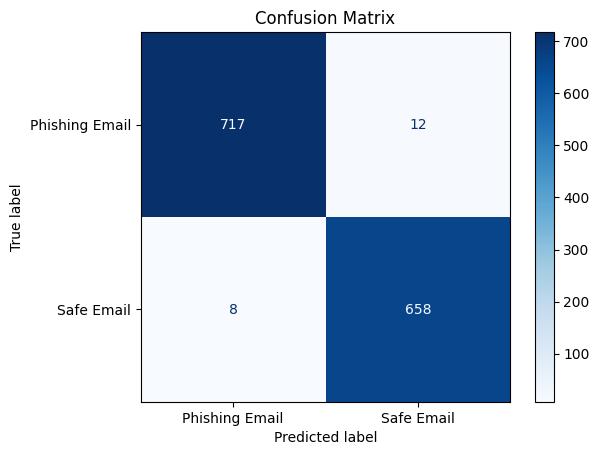

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(all_labels, all_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Phishing Email", "Safe Email"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
